## Data Loading & Exploration

### packages loading

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    classification_report, roc_auc_score,
    mean_absolute_error, mean_squared_error, r2_score
)

from xgboost import XGBClassifier, XGBRegressor

In [15]:
data_path = '../../../data/trianing_data/ai4i2020.csv'

In [12]:
def data_loading(data_path:str):
    df = pd.read_csv(data_path)
    return df

In [13]:
data_loading(data_path=data_path)

,UID,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


### metadata exploration

In [8]:
df.head()

,UID,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


| Column Name                              | Role    | Type        | Description (Plain English)                                                                                                                  |
| ---------------------------------------- | ------- | ----------- | -------------------------------------------------------------------------------------------------------------------------------------------- |
| **UID**                                  | ID      | Integer     | A unique identifier for each observation (row) in the dataset. Helps track individual records.                                               |
| **Product ID**                           | ID      | Categorical | Identifies the specific machine or product. Useful to know which machine a row of data belongs to.                                           |
| **Type**                                 | Feature | Categorical | The type or model of the machine. Machines of different types may behave differently or fail differently.                                    |
| **Air temperature**                      | Feature | Continuous  | The temperature of the surrounding air where the machine operates, in Kelvin. Extreme temperatures may impact performance.                   |
| **Process temperature**                  | Feature | Continuous  | The temperature of the machine or process itself during operation, in Kelvin. High temperature may indicate stress or potential failure.     |
| **Rotational speed**                     | Feature | Integer     | How fast the machine/tool is spinning, in RPM (revolutions per minute). Important for understanding operating conditions.                    |
| **Torque**                               | Feature | Continuous  | The twisting force applied by the machine, in Newton-meters. Changes in torque can indicate load changes, friction, or problems.             |
| **Tool wear**                            | Feature | Integer     | How worn the machine’s tool is (in minutes of usage or wear cycles). High tool wear increases the risk of failure.                           |
| **Machine failure**                      | Target  | Integer     | Indicator if the machine has failed (1 = failed, 0 = normal). This is what failure detection models try to predict.                          |
| **TWF** (Tool Wear Failure)              | Target  | Integer     | Indicates whether a failure was specifically caused by **tool wear**. For example, the tool became too worn and caused the machine to fail.  |
| **HDF** (Heat Dissipation Failure)       | Target  | Integer     | Indicates if the failure was caused by **overheating / thermal stress**. The machine may fail if it cannot dissipate heat efficiently.       |
| **PWF** (Power/Performance Wear Failure) | Target  | Integer     | Indicates whether the failure was due to **power, load, or general performance degradation**. Could be caused by overloading the machine.    |
| **OSF** (Overstrain Failure)             | Target  | Integer     | Indicates a failure caused by the machine being **overstrained**, e.g., operated beyond safe limits.                                         |
| **RNF** (Random Failure)                 | Target  | Integer     | Indicates a **failure that is random**, not caused by any specific identifiable factor above. Sometimes due to unexpected events or defects. |


In [9]:
df.info()
df.describe()
df['Machine failure'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UID                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

Machine failure
0    9661
1     339
Name: count, dtype: int64

### visuliztion

In [30]:
def plot_histograms(df, cols):
    df[cols].hist(figsize=(15, 10))
    plt.suptitle("Feature Histograms")
    plt.show()

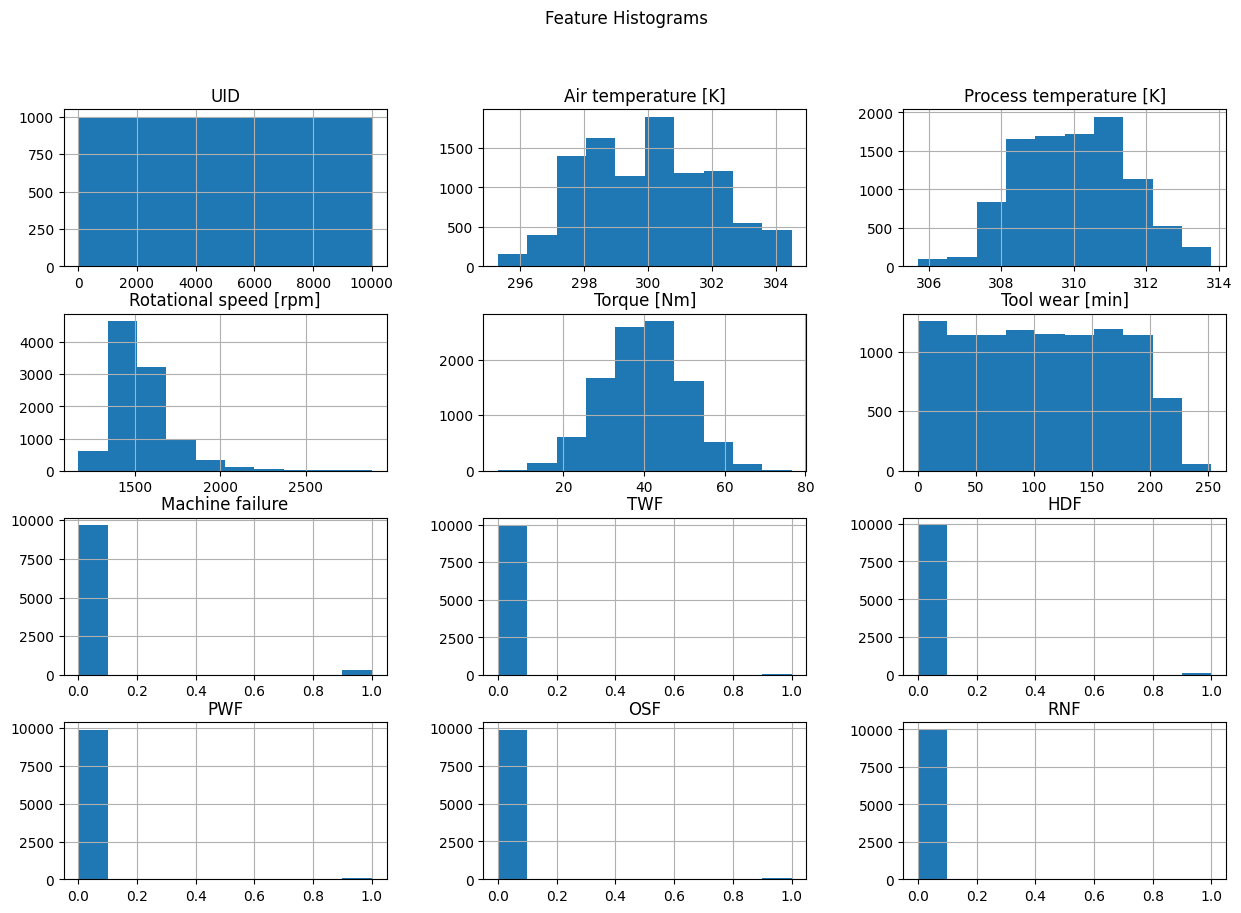

In [31]:
plot_histograms(df, df.columns)

In [36]:
def plot_correlation(df):
    # Select only numeric columns
    numeric_df = df.select_dtypes(include='number')
    
    plt.figure(figsize=(10, 6))
    sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
    plt.title("Correlation Matrix")
    plt.show()


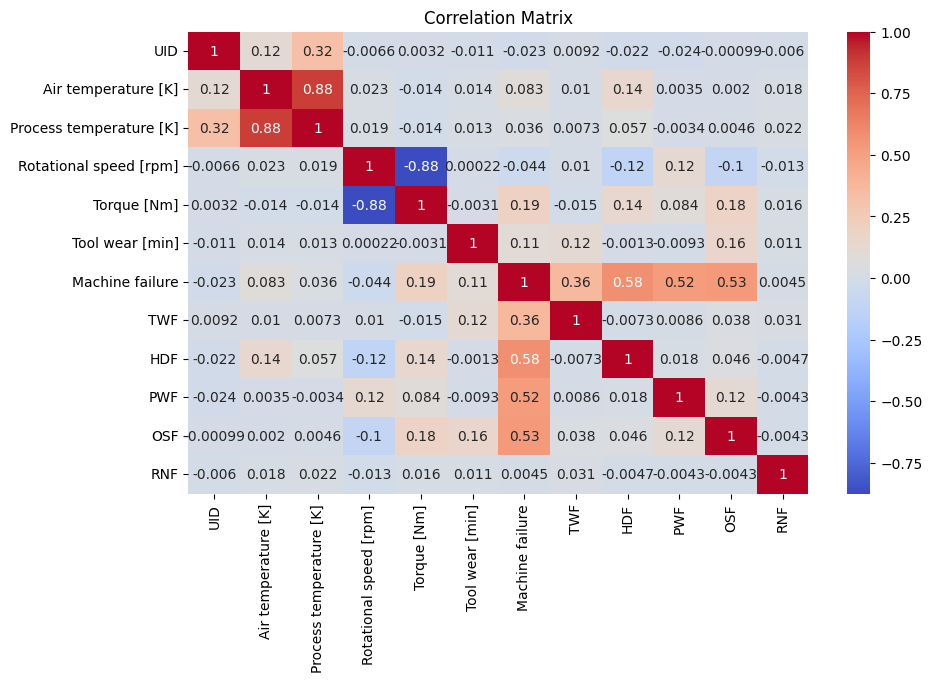

In [37]:
plot_correlation(df)

In [38]:
def plot_failure_distribution(df):
    plt.figure(figsize=(6,4))
    df["Machine failure"].value_counts().plot(kind="bar")
    plt.title("Failure vs Non-Failure Counts")
    plt.xlabel("Machine Failure (0 = No, 1 = Yes)")
    plt.ylabel("Count")
    plt.show()

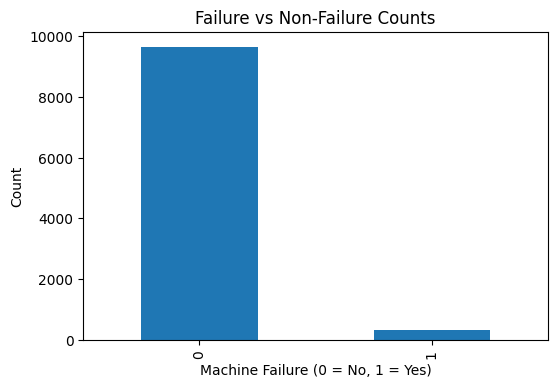

In [40]:
plot_failure_distribution(df)

In [41]:
def plot_boxplots(df, cols):
    for col in cols:
        plt.figure(figsize=(6,4))
        sns.boxplot(data=df, x="Machine failure", y=col)
        plt.title(f"{col} vs Failure")
        plt.show()

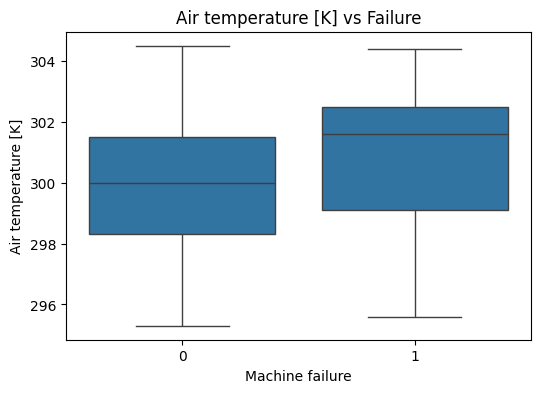

In [47]:
plot_boxplots(df, ['Air temperature [K]'])

## RUL Creation

In [43]:
def create_rul(df):
    max_wear = df["Tool wear [min]"].max()
    df["RUL"] = max_wear - df["Tool wear [min]"]
    return df

In [44]:
df_with_RUL = create_rul(df)
df_with_RUL

,UID,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,RUL
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0,253
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0,250
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0,248
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0,246
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0,239
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0,236
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0,231
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0,228


## Train–Test Split

In [48]:
def split_data(df):
    train, test = train_test_split(df, test_size=0.15, random_state=42)
    train, val = train_test_split(train, test_size=0.15, random_state=42)
    return train, val, test

In [49]:
train, val, test = split_data(df)

## Preprocessing Function (Encoder + Scaler)

In [50]:
def build_preprocessor(df):
    numeric = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    categorical = df.select_dtypes(include=['object']).columns.tolist()

    # Remove target columns if present
    numeric = [c for c in numeric if c not in ["Machine failure", "RUL"]]

    preprocessor = ColumnTransformer([
        ("num", StandardScaler(), numeric),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical)
    ])

    return preprocessor, numeric, categorical


In [51]:
preprocessor, numeric, categorical = build_preprocessor(df=df)

## Model Training

### Failure Classifier

In [52]:
def train_failure_model(preprocessor, train, val):
    X_train = train.drop(["Machine failure", "RUL"], axis=1)
    y_train = train["Machine failure"]

    X_val = val.drop(["Machine failure", "RUL"], axis=1)
    y_val = val["Machine failure"]

    model = Pipeline([
        ("prep", preprocessor),
        ("clf", XGBClassifier(
            n_estimators=300,
            max_depth=7,
            learning_rate=0.05,
            scale_pos_weight=5
        ))
    ])

    model.fit(X_train, y_train)
    return model


In [55]:
failure_classifier = train_failure_model(preprocessor, train, val)

### RUL Regression Model

In [54]:
def train_rul_model(preprocessor, train, val):
    X_train = train.drop(["Machine failure", "RUL"], axis=1)
    y_train = train["RUL"]

    X_val = val.drop(["Machine failure", "RUL"], axis=1)
    y_val = val["RUL"]

    model = Pipeline([
        ("prep", preprocessor),
        ("reg", XGBRegressor(
            n_estimators=400,
            max_depth=8,
            learning_rate=0.03
        ))
    ])

    model.fit(X_train, y_train)
    return model


In [64]:
rul_predictor = train_rul_model(preprocessor, train, val)

## Evaluation Functions

### Failure Classification Evaluation

In [57]:
def evaluate_failure(model, test):
    X_test = test.drop(["Machine failure", "RUL"], axis=1)
    y_test = test["Machine failure"]

    preds = model.predict(X_test)
    proba = model.predict_proba(X_test)[:, 1]

    print("\nClassification Report:\n", classification_report(y_test, preds))
    print("ROC-AUC:", roc_auc_score(y_test, proba))


In [58]:
evaluate_failure(failure_classifier, test)


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1453
           1       1.00      0.96      0.98        47

    accuracy                           1.00      1500
   macro avg       1.00      0.98      0.99      1500
weighted avg       1.00      1.00      1.00      1500

ROC-AUC: 0.9776983789957682


### RUL Regression Evaluation

In [61]:
def evaluate_rul(model, test):
    X_test = test.drop(["Machine failure", "RUL"], axis=1)
    y_test = test["RUL"]

    preds = model.predict(X_test)

    mae = mean_absolute_error(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    r2 = r2_score(y_test, preds)

    print("MAE:", mae)
    print("RMSE:", rmse)
    print("R2 Score:", r2)


In [66]:
evaluate_rul(rul_predictor, test)

MAE: 0.006524674594402313
RMSE: 0.1149035611072761
R2 Score: 0.9999969005584717


## FULL PIPELINE RUNNER

In [ ]:
def run_pipeline(path):
    df = load_data(path)
    df = create_rul(df)
    
    train, val, test = split_data(df)
    
    preprocessor, num_cols, cat_cols = build_preprocessor(df)

    failure_model = train_failure_model(preprocessor, train, val)
    rul_model = train_rul_model(preprocessor, train, val)

    print("=== FAILURE MODEL EVALUATION ===")
    evaluate_failure(failure_model, test)

    print("\n=== RUL MODEL EVALUATION ===")
    evaluate_rul(rul_model, test)

    return failure_model, rul_model


In [67]:
import joblib
import os

folder_path = "../../../business/ml/models"

joblib.dump(failure_classifier, os.path.join(folder_path, "failure_classifier.pkl"))

joblib.dump(rul_predictor, os.path.join(folder_path, "rul_regressor.pkl"))

joblib.dump(preprocessor, os.path.join(folder_path, "preprocessor.pkl"))

print("All models and preprocessor saved successfully!")


All models and preprocessor saved successfully!


In [70]:
test.to_csv("../../../tests/test_set.csv", index=False)
print("Test set saved as CSV!")


Test set saved as CSV!
